type= 9551
token= 73824
TTR= 0.1293752709146077


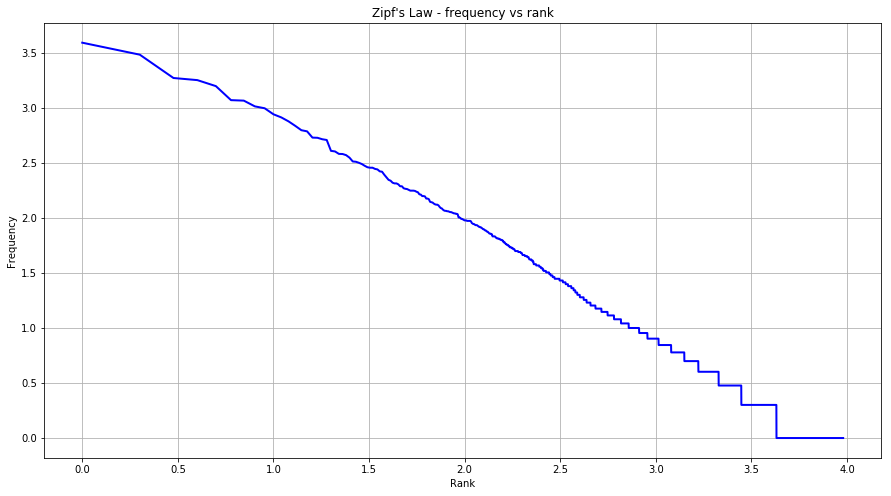

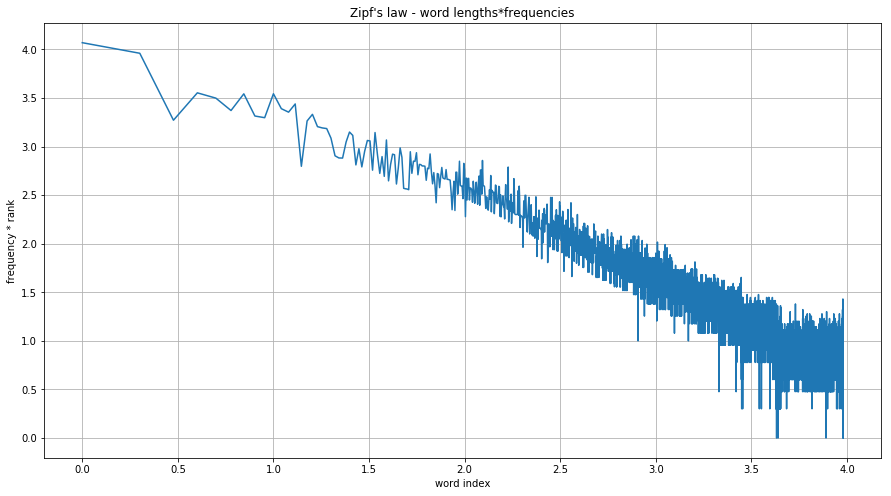

vocab size= 73824
word size= 73824
k = 6.413, beta = 0.655


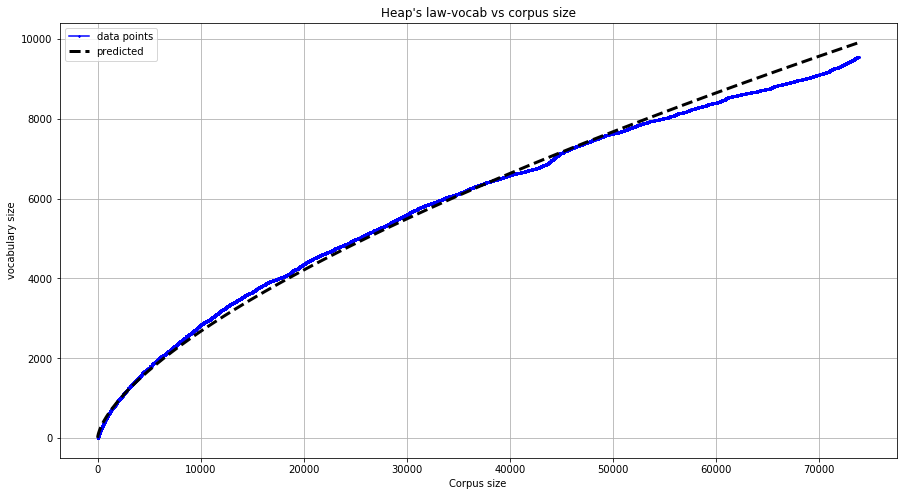

In [83]:
import string
import operator
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression
import numpy as np
file = open('tom.txt').read()
line = alltext.translate(str.maketrans('', '', string.punctuation))
text = line.translate({ord('\n'):' ', ord('\"'):''}).lower()
words = [w for w in filter(lambda x: len(x)>0, text.split(' '))]

d={}
for w in words:
    if w not in d:
        d[w]=1
    else:
        d[w]+=1
print("type=",len(d))
print("token=",len(words))
print ("TTR=", len(d) / len(words))
    
word_count = sorted(d.items(), key=operator.itemgetter(1))[::-1]
matplotlib.rcParams['figure.figsize'] = 15,8
x = np.log10(list(range(1, len(word_count)+1)))
y = np.log10(list(map(lambda x: x[1], word_count)))

plt.plot(x,y, lw=2, color='blue')
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("Zipf's Law - frequency vs rank")
plt.grid()
plt.show()


l = np.array([len(x[0]) for x in word_count])
f = np.array([x[1] for x in word_count])
plt.plot(np.log10(list(range(1, len(l*f)+1))), np.log10(l*f))
plt.ylabel("frequency * rank")
plt.xlabel("word index")
plt.title("Zipf's law - word lengths*frequencies")
plt.grid()
plt.show()


vocab = set()
vocab_size = [] 
for i in words:
    vocab.add(i)
    vocab_size.append(len(vocab))
    

print("vocab size=",len(vocab_size))
print("word size=",len(words))

x = np.log(list(range(1, len(words)+1))).reshape(-1,1)
y = np.log(vocab_size)

model = LinearRegression()
model.fit(x,y)
K = np.exp(model.intercept_)
beta = model.coef_[0]
print ("k = {0:.3f}, beta = {1:.3f}".format(K, beta))
Y_predicted = np.exp(model.predict(x))

xaxis = list(range(1, len(words)+1))
plt.plot(xaxis, vocab_size, markersize=2, marker='*', color='blue', label="data points")
plt.plot(xaxis, Y_predicted, color='black', lw=3, linestyle='--', label="predicted")

plt.title("Heap's law-vocab vs corpus size")
plt.xlabel("Corpus size")
plt.ylabel("vocabulary size")
plt.grid()
plt.legend()

plt.show()


8785
